# Practica regresion polinomial

Cabello Cardenas Ulises Abdiel

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [2]:
datos1 = pd.read_csv("cal_housing.csv")
datos2 = pd.read_csv("datos.csv")

In [3]:
datos2

,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128
...,...,...
95,5.878571,36.139165
96,2.117848,-8.607422
97,0.430170,-3.414761
98,-0.315372,-1.059461


## Division de datos

In [4]:
X = datos2[['x']]
y = datos2['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, shuffle=True, random_state=0
)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test :", y_test.shape)

Tamaño del conjunto de entrenamiento: (70, 1)
Tamaño del conjunto de prueba: (30, 1)
Tamaño de X_train: (70, 1)
Tamaño de X_test : (30, 1)
Tamaño de y_train: (70,)
Tamaño de y_test : (30,)


## Regresion lineal con OLS

🔹 Regresión lineal con OLS
MSE: 296.0945867766399
R²: 0.7198048208163852


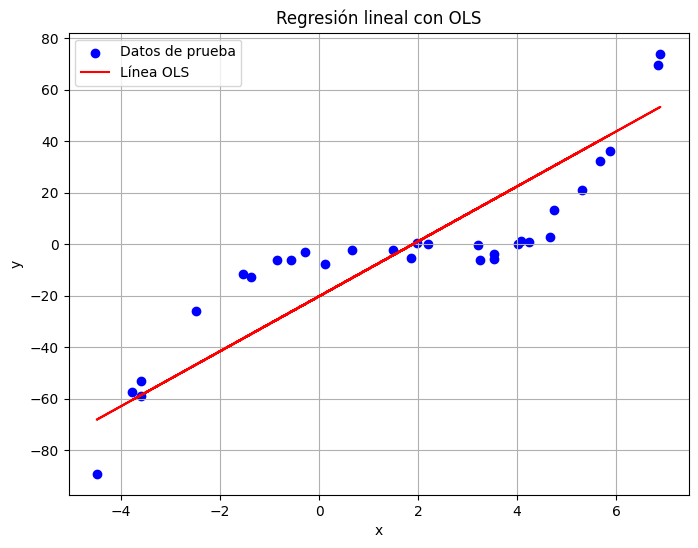

In [5]:
# 3. Crear y entrenar modelo lineal OLS
modelo_ols = LinearRegression()
modelo_ols.fit(X_train, y_train)

# 4. Predecir sobre datos de prueba
y_pred = modelo_ols.predict(X_test)

# 5. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Imprimir resultados (resumen solicitado)
print("🔹 Regresión lineal con OLS")
print("MSE:", mse)
print("R²:", r2)

# 7. Graficar resultados
plt.figure(figsize=(8, 6))

# Puntos reales (X_test, y_test)
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')

# Línea de regresión (X_test, y_pred)
plt.plot(X_test, y_pred, color='red', label='Línea OLS')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal con OLS')
plt.legend()
plt.grid(True)
plt.show()

## Regresion polinomial de grado 2 con OLS

🔹 Regresión polinomial grado 2 con OLS
MSE: 352.4373840101116
R²: 0.6664874659184126


C:\Users\Rulig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


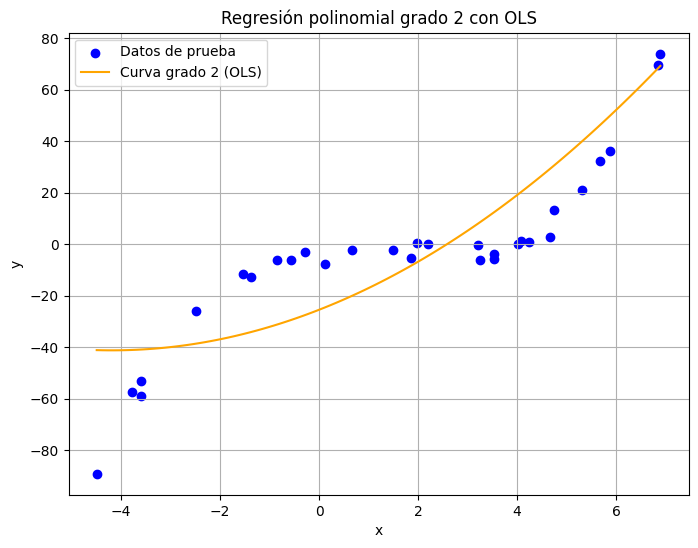

In [6]:
# 3. Generar características polinómicas de grado 2
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

# 4. Crear y entrenar el modelo sobre variables polinómicas
modelo_poly2 = LinearRegression()
modelo_poly2.fit(X_train_poly2, y_train)

# 5. Predecir sobre conjunto de prueba
y_pred = modelo_poly2.predict(X_test_poly2)

# 6. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Imprimir resultados (resumen solicitado)
print("🔹 Regresión polinomial grado 2 con OLS")
print("MSE:", mse)
print("R²:", r2)

# 8. Graficar resultados
plt.figure(figsize=(8, 6))

# Puntos reales de prueba
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')

# Para pintar la curva: generar puntos ordenados
x_range = np.linspace(X_test['x'].min(), X_test['x'].max(), 100).reshape(-1, 1)
x_range_poly = poly2.transform(x_range)
y_range_pred = modelo_poly2.predict(x_range_poly)

# Dibujar curva
plt.plot(x_range, y_range_pred, color='orange', label='Curva grado 2 (OLS)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión polinomial grado 2 con OLS')
plt.legend()
plt.grid(True)
plt.show()

## Regresion polinomial de grado 3 con OLS

🔹 Regresión polinomial grado 3 con OLS
MSE: 8.487854131822667
R²: 0.9919679186464003


C:\Users\Rulig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


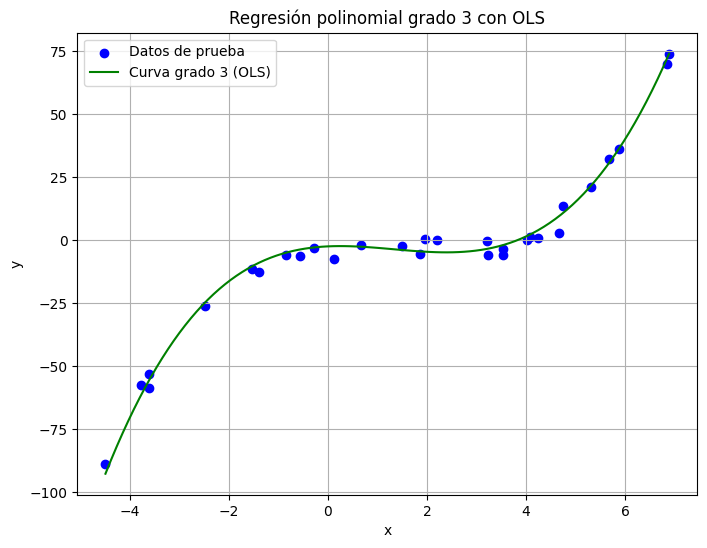

In [7]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# 4. Crear y entrenar el modelo OLS
modelo_poly3 = LinearRegression()
modelo_poly3.fit(X_train_poly3, y_train)

# 5. Predecir sobre conjunto de prueba
y_pred = modelo_poly3.predict(X_test_poly3)

# 6. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Imprimir resultados
print("🔹 Regresión polinomial grado 3 con OLS")
print("MSE:", mse)
print("R²:", r2)

# 8. Graficar resultados
plt.figure(figsize=(8, 6))

# Puntos reales
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')

# Curva predicha ordenada
x_range = np.linspace(X_test['x'].min(), X_test['x'].max(), 100).reshape(-1, 1)
x_range_poly = poly3.transform(x_range)
y_range_pred = modelo_poly3.predict(x_range_poly)

plt.plot(x_range, y_range_pred, color='green', label='Curva grado 3 (OLS)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión polinomial grado 3 con OLS')
plt.legend()
plt.grid(True)
plt.show()

## Regresion lineal con SGD

C:\Users\Rulig\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


🔹 Regresión lineal con SGD (sin escalar)
MSE: 554.9631368548045
R²: 0.47483674975580237


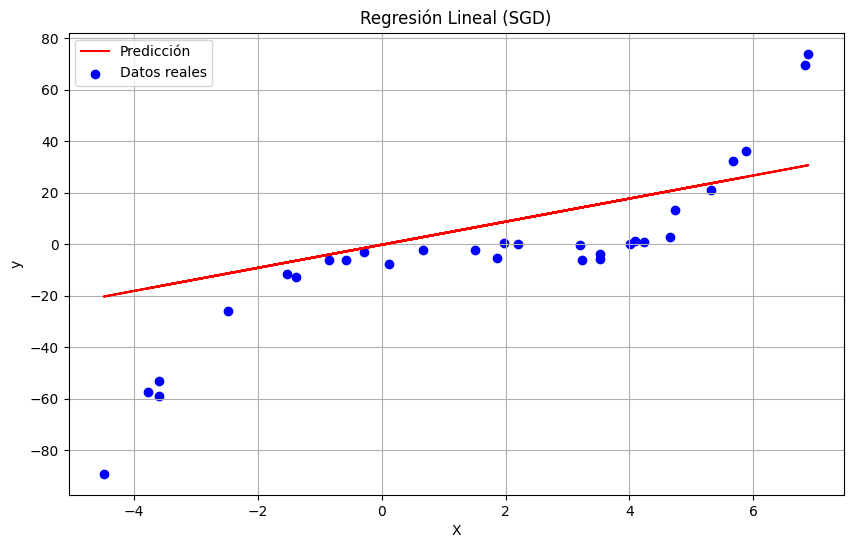

In [8]:
# 3. Crear y entrenar el modelo SGD (sin escalar)
modelo_sgd = SGDRegressor(
    max_iter=10000,
    eta0=1e-7,
    learning_rate='constant',
    random_state=0
)
modelo_sgd.fit(X_train, y_train)

# 4. Predecir
y_pred = modelo_sgd.predict(X_test)

# 5. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Imprimir resultados
print("🔹 Regresión lineal con SGD (sin escalar)")
print("MSE:", mse)
print("R²:", r2)

# 7. Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.title('Regresión Lineal (SGD)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Regresion polinomial de grado 2 con SGD

C:\Users\Rulig\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Rulig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


🔹 Regresión Polinomial (SGD) Grado 2
MSE: 872.3737220222637
R²: 0.1744701785396181


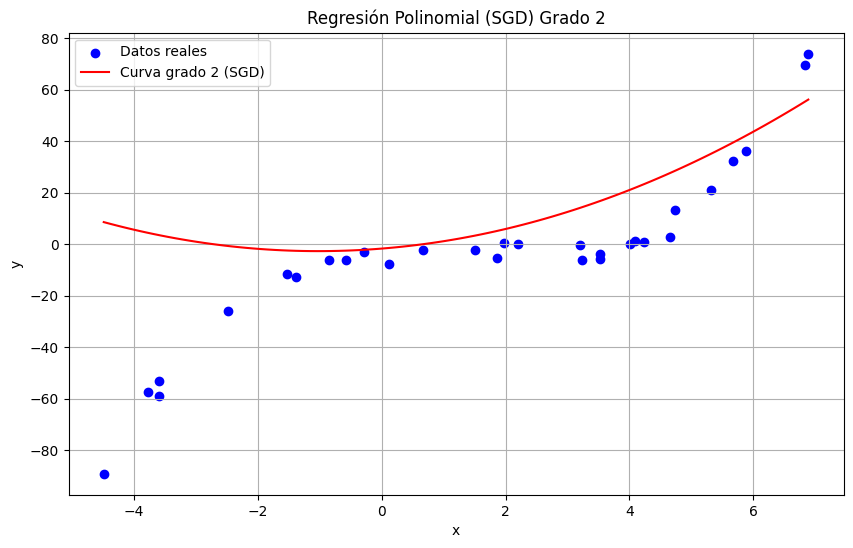

In [9]:
# Parámetro de grado polinomial
degree = 2

# 1. Crear características polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)  # ✅ CORREGIDO: debe ser transform, no fit_transform

# 2. Crear modelo
model = SGDRegressor(
    max_iter=10000,
    eta0=0.0000001,
    learning_rate='constant'
)

# 3. Entrenar modelo con manejo de errores
try:
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
except Exception as e:
    print(f"Error durante el entrenamiento: {str(e)}")
    y_pred = None

# 4. Evaluar
if y_pred is not None:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"🔹 Regresión Polinomial (SGD) Grado {degree}")
    print("MSE:", mse)
    print("R²:", r2)

    # 5. Graficar
    # Obtener eje x para graficar dependiendo del tipo de X_test
    if isinstance(X_test, pd.DataFrame):
        x_column = X_test.iloc[:, 0]
    else:
        x_column = X_test[:, 0]

    plt.figure(figsize=(10, 6))
    plt.scatter(x_column, y_test, color='blue', label='Datos reales')

    x_range = np.linspace(x_column.min(), x_column.max(), 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_range_pred = model.predict(x_range_poly)

    plt.plot(x_range, y_range_pred, color='red', label=f'Curva grado {degree} (SGD)')
    plt.title(f'Regresión Polinomial (SGD) Grado {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


## Regresion polinomial de grado 3 con SGD

🔹 Regresión polinomial grado 3 con SGD (sin escalar)
MSE: 15.526946765858376
R²: 0.9853068045633809


C:\Users\Rulig\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


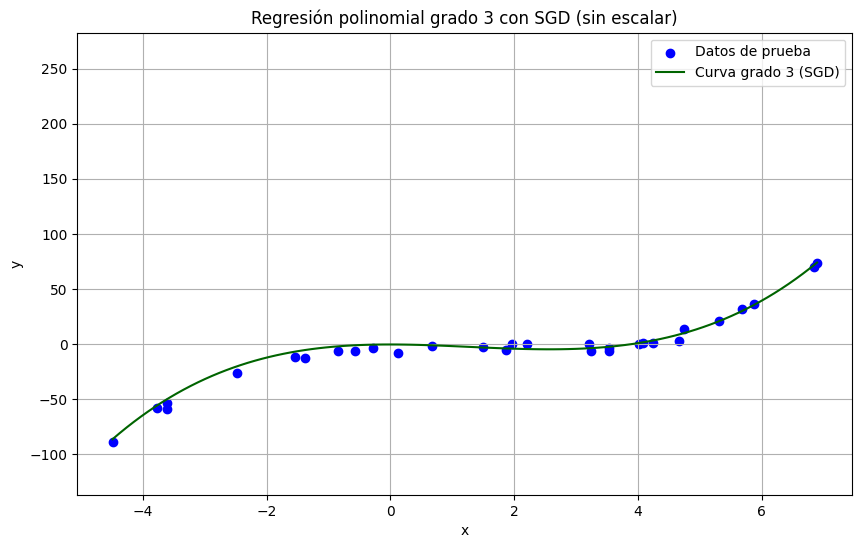

In [10]:
# Parámetro del grado
degree = 3

# 1. Crear características polinomiales de grado 3
poly3 = PolynomialFeatures(degree=degree)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# 2. Crear y entrenar modelo SGD (sin escalar)
modelo_sgd_poly3 = SGDRegressor(
    max_iter=10000,
    eta0=0.0000001,
    learning_rate='constant'
)

try:
    modelo_sgd_poly3.fit(X_train_poly3, y_train)
    y_pred = modelo_sgd_poly3.predict(X_test_poly3)
except Exception as e:
    print(f"Error durante el entrenamiento: {str(e)}")
    y_pred = None

# 3. Calcular métricas y graficar si no hubo error
if y_pred is not None:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"🔹 Regresión polinomial grado {degree} con SGD (sin escalar)")
    print("MSE:", mse)
    print("R²:", r2)

    # 4. Graficar resultados
    plt.figure(figsize=(10, 6))

    # Obtener columna de entrada
    if isinstance(X_test, pd.DataFrame):
        x_column = X_test.iloc[:, 0]
    else:
        x_column = X_test[:, 0]

    plt.scatter(x_column, y_test, color='blue', label='Datos de prueba')

    # Curva suavizada
    x_range = np.linspace(x_column.min(), x_column.max(), 100).reshape(-1, 1)
    x_range_poly3 = poly3.transform(x_range)
    y_range_pred = modelo_sgd_poly3.predict(x_range_poly3)

    # Protección visual (clip para evitar explosiones)
    y_range_pred_clipped = np.clip(y_range_pred, y.min() - 10, y.max() + 10)

    plt.plot(x_range, y_range_pred_clipped, color='darkgreen', label='Curva grado 3 (SGD)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regresión polinomial grado 3 con SGD (sin escalar)')
    plt.legend()
    plt.grid(True)
    plt.ylim(y.min() - 10, y.max() + 10)
    plt.show()


# Practica par2

In [11]:
# Separar características (X) y variable objetivo (y)
X = datos1.iloc[:, :-1]  # Todas menos la última
y = datos1.iloc[:, -1]   # Última columna: medianHouseValue

# Dividir: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, shuffle=True, random_state=0
)

# Verificar tamaños
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test :", y_test.shape)


Tamaño de X_train: (16512, 8)
Tamaño de X_test : (4128, 8)
Tamaño de y_train: (16512,)
Tamaño de y_test : (4128,)


🔹 Modelo: Regresión lineal con OLS
MSE: 4853781771.947949
R²: 0.6277645980446463


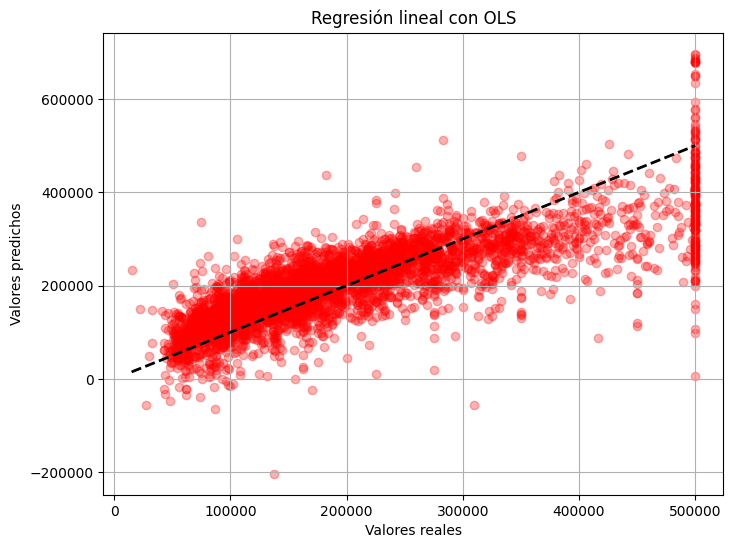

In [12]:
# 3. Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, shuffle=True, random_state=0
)

# 4. Crear y entrenar el modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# 5. Predecir
y_pred = modelo_lineal.predict(X_test)

# 6. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Mostrar resultados
print("🔹 Modelo: Regresión lineal con OLS")
print("MSE:", mse)
print("R²:", r2)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión lineal con OLS')
plt.grid(True)
plt.show()

🔹 Modelo: Polinomial grado 2 con OLS (sin escalar)
MSE: 4076152912.267426
R²: 0.6874007755152076


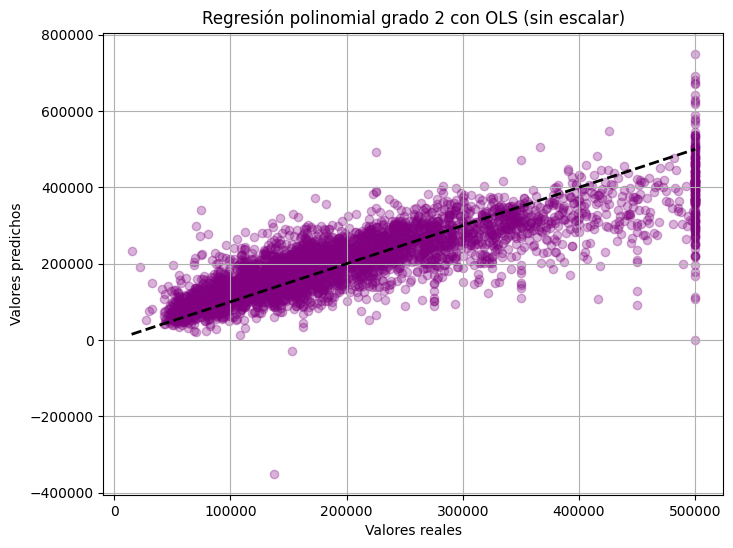

In [13]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.fit_transform(X_test)

# 5. Entrenar modelo OLS
modelo_poly2 = LinearRegression()
modelo_poly2.fit(X_train_poly2, y_train)

# 6. Predecir
y_pred = modelo_poly2.predict(X_test_poly2)

# 7. Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Mostrar resultados
print("🔹 Modelo: Polinomial grado 2 con OLS (sin escalar)")
print("MSE:", mse)
print("R²:", r2)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión polinomial grado 2 con OLS (sin escalar)')
plt.grid(True)
plt.show()

In [14]:
# Grado del polinomio
degree = 2

# 1. Crear características polinomiales
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)  # 🔸 Se deja así como en tu versión original

# 2. Escalamiento estándar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.fit_transform(X_test_poly)  # 🔸 También se deja como en tu versión

# 3. Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Predicción
y_pred = model.predict(X_test_scaled)

# 5. Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Imprimir resultados
print(f"🔹 Polinomial de grado {degree} con escalamiento estándar")
print("MSE:", mse)
print("R²:", r2)


🔹 Polinomial de grado 2 con escalamiento estándar
MSE: 4111950340.7116656
R²: 0.6846554790037491


In [15]:
# Grado del polinomio
degree = 2

# 1. Elevar a características polinomiales
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)  # 🔸 Se deja igual que en tu función original

# 2. Escalamiento robusto
robusto = RobustScaler()
X_train_robusto = robusto.fit_transform(X_train_poly)
X_test_robusto = robusto.fit_transform(X_test_poly)  # 🔸 Se deja como en tu versión

# 3. Regresor lineal con parámetros por default
model = LinearRegression()
model.fit(X_train_robusto, y_train)

# 4. Predicción
y_pred = model.predict(X_test_robusto)

# 5. Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Resultados
print(f"🔹 Polinomial de grado {degree} con escalamiento robusto")
print("MSE:", mse)
print("R²:", r2)


🔹 Polinomial de grado 2 con escalamiento robusto
MSE: 5047513814.436906
R²: 0.6129073324946612


🔹 Modelo: Polinomial grado 3 con OLS (sin escalar)
MSE: 4136311656.0023623
R²: 0.6827872153661454


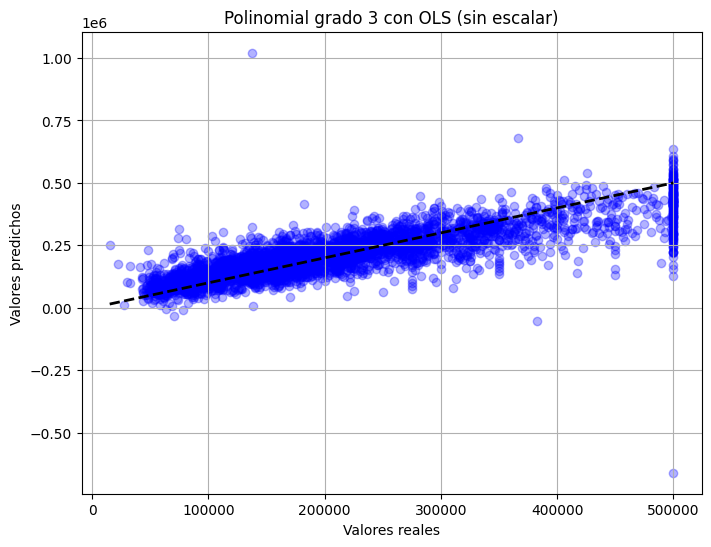

In [16]:
# 3. Generar características polinómicas de grado 3 (sin escalar)
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# 4. Entrenar el modelo OLS
modelo_poly3 = LinearRegression()
modelo_poly3.fit(X_train_poly3, y_train)

# 5. Predecir
y_pred = modelo_poly3.predict(X_test_poly3)

# 6. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Mostrar resultados
print("🔹 Modelo: Polinomial grado 3 con OLS (sin escalar)")
print("MSE:", mse)
print("R²:", r2)

# 8. Gráfica de resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Polinomial grado 3 con OLS (sin escalar)')
plt.grid(True)
plt.show()

In [17]:
# Grado del polinomio
degree = 3

# 1. Crear características polinomiales
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)  # 🔸 Se deja así como en tu versión original

# 2. Escalamiento estándar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.fit_transform(X_test_poly)  # 🔸 También se deja como en tu versión

# 3. Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Predicción
y_pred = model.predict(X_test_scaled)

# 5. Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Imprimir resultados
print(f"🔹 Polinomial de grado {degree} con escalamiento estándar")
print("MSE:", mse)
print("R²:", r2)


🔹 Polinomial de grado 3 con escalamiento estándar
MSE: 8862039818.138306
R²: 0.32037221514283687


In [18]:
# Grado del polinomio
degree = 3

# 1. Elevar a características polinomiales
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)  # 🔸 Se deja igual que en tu función original

# 2. Escalamiento robusto
robusto = RobustScaler()
X_train_robusto = robusto.fit_transform(X_train_poly)
X_test_robusto = robusto.fit_transform(X_test_poly)  # 🔸 Se deja como en tu versión

# 3. Regresor lineal con parámetros por default
model = LinearRegression()
model.fit(X_train_robusto, y_train)

# 4. Predicción
y_pred = model.predict(X_test_robusto)

# 5. Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Resultados
print(f"🔹 Polinomial de grado {degree} con escalamiento robusto")
print("MSE:", mse)
print("R²:", r2)


🔹 Polinomial de grado 3 con escalamiento robusto
MSE: 8684145316199.728
R²: -664.9850966305397
